# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Deep Learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load Dataset

In [4]:
import pandas as pd

df = pd.read_csv(r'C:\Users\DELL\NLP Lab Project\moviereviews.tsv', sep="\t")

# Display first rows
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [6]:
print(df.columns)

Index(['label', 'review'], dtype='object')


# Dataset Information & Attributes

In [9]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Dataset attributes
df.info()

# Check missing values
df.isnull().sum()

Dataset Shape: (2000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


label      0
review    35
dtype: int64

In [11]:
df['review'] = df['review'].fillna("")

# Text Preprocessing

In [14]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text

df['clean_review'] = df['review'].apply(preprocess_text)

# Encode Target Variable

In [17]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [19]:
df[['review', 'label']].sample(10)

,review,label
563,"a documentary from the twin hughes brothers , ...",0
1002,"like a good action film should , "" metro "" has...",0
1860,"only a year after the initial release of "" scr...",1
1226,"you don't need to have seen the original "" spe...",0
423,"now that "" boogie nights "" has made disco resp...",1
94,the marvelous british actor derek jacobi stars...,0
960,the thought-provoking question of tradition ov...,1
1389,take a look at the following equation . . . . ...,0
1130,david mamet has long been my favorite screenwr...,1
1576,don't let this movie fool you into believing t...,0


# Train–Test Split (70/30)

In [22]:
X = df['clean_review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TF-IDF Vectorization

In [25]:
tfidf = TfidfVectorizer(max_features=3000)

X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

# Apply All Machine Learning Models

In [28]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Evaluation + Classification Report + Confusion Matrix


 Naive Bayes
Accuracy: 0.8016666666666666
Precision: 0.8267148014440433
Recall: 0.7633333333333333
F1-Score: 0.7937608318890814
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       300
           1       0.83      0.76      0.79       300

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



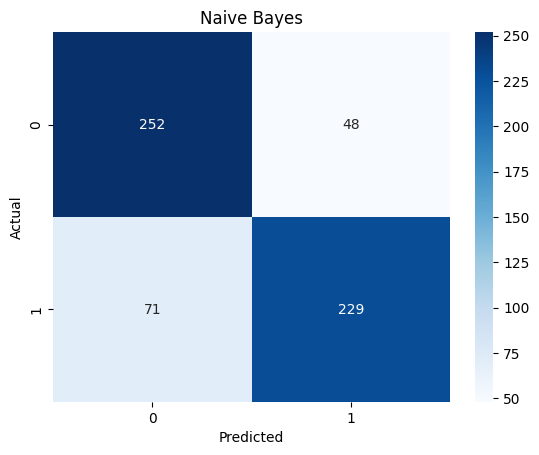


 Logistic Regression
Accuracy: 0.8083333333333333
Precision: 0.8114478114478114
Recall: 0.8033333333333333
F1-Score: 0.8073701842546064
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       300
           1       0.81      0.80      0.81       300

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



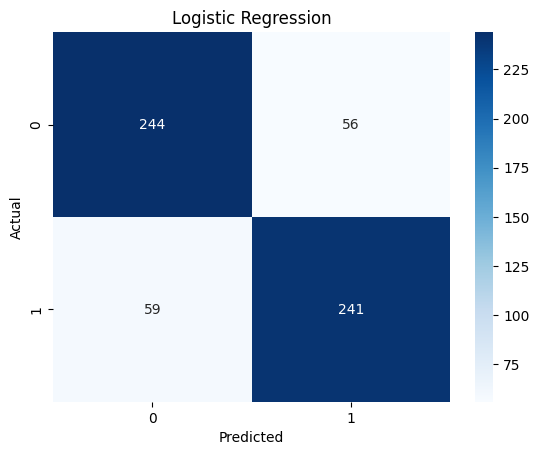


 SVM
Accuracy: 0.835
Precision: 0.8526315789473684
Recall: 0.81
F1-Score: 0.8307692307692308
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       300
           1       0.85      0.81      0.83       300

    accuracy                           0.83       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.84      0.83      0.83       600



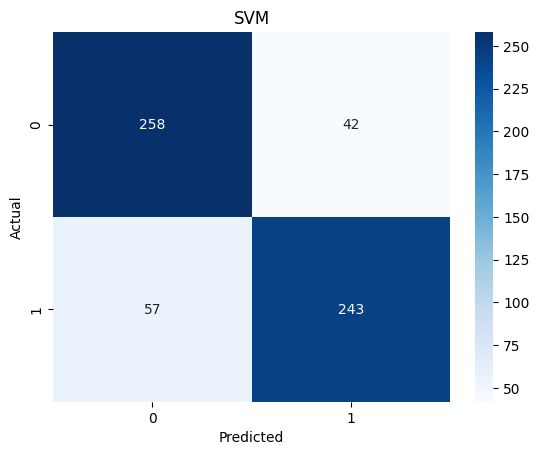


 Decision Tree
Accuracy: 0.6416666666666667
Precision: 0.6534296028880866
Recall: 0.6033333333333334
F1-Score: 0.6273830155979203
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       300
           1       0.65      0.60      0.63       300

    accuracy                           0.64       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.64      0.64      0.64       600



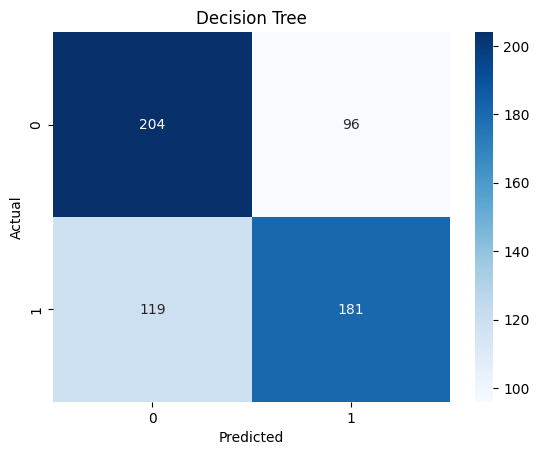


 Random Forest
Accuracy: 0.7866666666666666
Precision: 0.8257575757575758
Recall: 0.7266666666666667
F1-Score: 0.7730496453900709
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       300
           1       0.83      0.73      0.77       300

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600



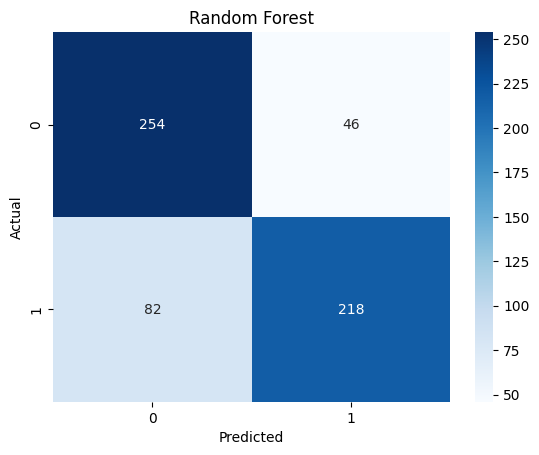

In [31]:
for name, model in models.items():
    model.fit(X_train_tf, y_train)
    y_pred = model.predict(X_test_tf)

    print("\n", name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# Deep Learning Tokenization

In [34]:
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# LSTM Model

In [37]:
model = Sequential([
    Embedding(3000, 64, input_length=100),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train, epochs=3, batch_size=64)

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.4675 - loss: 0.6935
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7350 - loss: 0.6822
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7652 - loss: 0.5394


# LSTM Evaluation + Heatmap

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
LSTM Accuracy: 0.7233333333333334
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       300
           1       0.72      0.72      0.72       300

    accuracy                           0.72       600
   macro avg       0.72      0.72      0.72       600
weighted avg       0.72      0.72      0.72       600



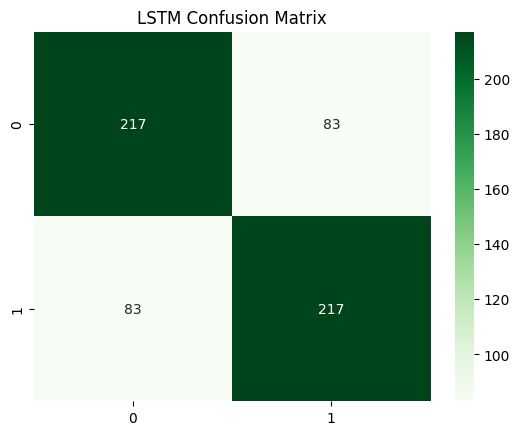

In [40]:
y_pred_dl = (model.predict(X_test_pad) > 0.5).astype(int)

print("LSTM Accuracy:", accuracy_score(y_test, y_pred_dl))
print(classification_report(y_test, y_pred_dl))

cm = confusion_matrix(y_test, y_pred_dl)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("LSTM Confusion Matrix")
plt.show()

# Comparison of ML vs DL Performance

In [43]:
# Store ML results
ml_results = []

for name, model in models.items():
    model.fit(X_train_tf, y_train)
    y_pred = model.predict(X_test_tf)

    ml_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# Deep Learning (LSTM) metrics
dl_results = {
    "Model": "LSTM (Deep Learning)",
    "Accuracy": accuracy_score(y_test, y_pred_dl),
    "Precision": precision_score(y_test, y_pred_dl),
    "Recall": recall_score(y_test, y_pred_dl),
    "F1-Score": f1_score(y_test, y_pred_dl)
}

# Combine results
comparison_df = pd.DataFrame(ml_results)
comparison_df = pd.concat([comparison_df, pd.DataFrame([dl_results])])

comparison_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.801667,0.826715,0.763333,0.793761
1,Logistic Regression,0.808333,0.811448,0.803333,0.807370
2,SVM,0.835000,0.852632,0.810000,0.830769
3,Decision Tree,0.606667,0.615942,0.566667,0.590278
4,Random Forest,0.793333,0.830827,0.736667,0.780919
0,LSTM (Deep Learning),0.723333,0.723333,0.723333,0.723333


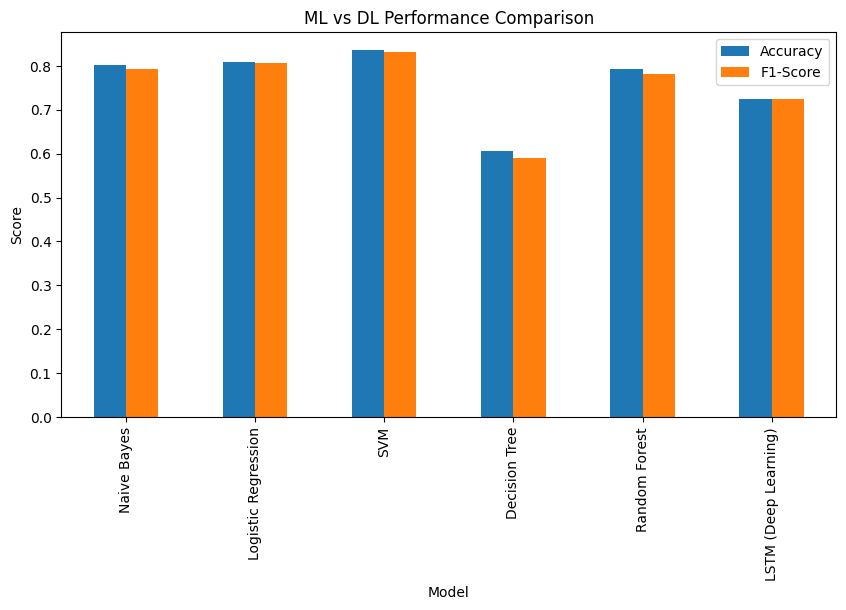

In [45]:
comparison_df.set_index("Model")[["Accuracy", "F1-Score"]].plot(
    kind="bar", figsize=(10,5)
)
plt.title("ML vs DL Performance Comparison")
plt.ylabel("Score")
plt.show()